In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [4]:
data_display = pd.read_csv("dataset2.csv")

print(data_display)

     WL1(mm)  WL2(mm)  WL3(mm)  WL4 (mm)  WL5 (mm)  Solar (W/m2)  \
0        124      324       50        38        56           678   
1        123      322       50        38        56           550   
2        123      322       50        38        56            71   
3        132      330       54        38        56            22   
4        130      333       55        38        57             0   
..       ...      ...      ...       ...       ...           ...   
714       37       41       40        36        44             0   
715       37       40       39        36        44             0   
716       37       40       39        36        44             0   
717       37       41       40        36        44             0   
718       37       41       40        36        44             0   

     WindSpeed (m/s)  AirTemp (DegC)  RH (%)  (delta)PD (mm)  
0               1.48            25.6      64            -1.0  
1               1.40            25.2      66            -

In [5]:
learning_rate = 0.001
trainning_steps = 15000
display_step = 1000

w_pred = 0

In [14]:
data = np.loadtxt("dataset2_np.csv", delimiter = ',', dtype = np.float32)

x_train = data[:500, [0]]
x_test = data[500:, [0]]

y_train = data[:500, [-1]]
y_test = data[500:, [-1]]

w1 = tf.Variable(random.random())
w2 = tf.Variable(random.random())
bias = tf.Variable(random.random())

In [15]:
def compute_loss():
    hypothesis = w1 * x_train * x_train + w2 * x_train + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w1:', w1.numpy(), '\n', 'w2:', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')
        
        w1_pred = w1.numpy()
        w2_pred = w2.numpy()

step: 1000 
 w1: -0.0073199845 
 w2: 0.6493127 
 bias: -0.015358127 
 loss: 218.34761 

step: 2000 
 w1: -0.0070319166 
 w2: 0.6215565 
 bias: -0.08039637 
 loss: 198.71515 

step: 3000 
 w1: -0.006493475 
 w2: 0.5750002 
 bias: -0.18914683 
 loss: 167.86668 

step: 4000 
 w1: -0.0056795357 
 w2: 0.50460535 
 bias: -0.35220975 
 loss: 126.18659 

step: 5000 
 w1: -0.0045604208 
 w2: 0.4077696 
 bias: -0.57297593 
 loss: 78.60547 

step: 6000 
 w1: -0.00320802 
 w2: 0.29065982 
 bias: -0.83348906 
 loss: 36.106888 

step: 7000 
 w1: -0.0018658806 
 w2: 0.17433849 
 bias: -1.085019 
 loss: 10.116409 

step: 8000 
 w1: -0.0008892052 
 w2: 0.089629166 
 bias: -1.2636887 
 loss: 1.3112037 

step: 9000 
 w1: -0.00045646066 
 w2: 0.05205733 
 bias: -1.3400356 
 loss: 0.1266378 

step: 10000 
 w1: -0.00036885394 
 w2: 0.044389892 
 bias: -1.3509938 
 loss: 0.08923661 

step: 11000 
 w1: -0.0003622071 
 w2: 0.04369936 
 bias: -1.3438315 
 loss: 0.088874124 

step: 12000 
 w1: -0.0003594157 
 w2

In [16]:
line_x = np.arange(min(x_test), max(x_test), 0.01)
line_y = w1_pred * line_x * line_x + w2_pred * line_x + bias

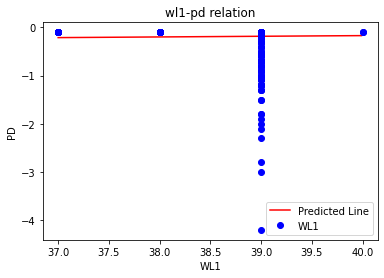

In [17]:
#plt.figure(figsize = (15, 5))

plt.plot(line_x, line_y, 'r-', label = 'Predicted Line')
plt.plot(x_test, y_test, 'bo', label = 'WL1')
plt.title('wl1-pd relation')
plt.xlabel('WL1')
plt.ylabel('PD')
plt.legend(loc = 'lower right')
plt.show()

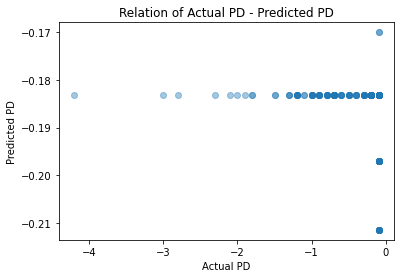

In [18]:
# 실제 담수심과 예상 담수심 간 관계.

y_hat = hypothesis = w1_pred * x_test * x_test + w2_pred * x_test + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [19]:
def rmse(x_test, y_test):
    y_hat = hypothesis = w1_pred * x_test * x_test + w2_pred * x_test + bias
    error = y_hat - y_test
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

print(rmse(x_test, y_test))

0.6186185
